In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import plotly.offline as py

In [13]:
pizza_df = pd.read_csv("pizza.csv")

In [14]:
pizza_df['province'].nunique()

44

In [398]:
pizza_df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


 # finding number of pizza chicken orders in US

In [132]:
len([i for i in pizza_df["menus.name"].unique() if "chicken" in i.lower()])

421

# grouping with city to find the restaurant where chicken was ordered

In [147]:
pizza_df[pizza_df["menus.name"].isin([i for i in pizza_df["menus.name"].unique() if "chicken" in i.lower()])].groupby("city")["name"].value_counts().sort_values(ascending=False).head(10)

city          name                             
Los Angeles   California Pizza Kitchen             18
Springfield   Coburg Pizza Company                 11
New York      New York Pizza Suprema               11
Brooklyn      City Line Pizza and Pasta            10
Irwin         Mr Mikes Pub Pizza                   10
South Jordan  Brick Oven                           10
Flushing      Gino's Pizzeria                       9
Seattle       Olympia Pizza and Spaghetti House     9
Syracuse      Pizza Hut                             8
Henderson     Angelina's Pizzeria                   8
Name: name, dtype: int64

# top 5 pizzas which was ordered in US

In [399]:
pizza_df["menus.name"].value_counts().head()

Cheese Pizza             299
White Pizza              225
Hawaiian Pizza           149
Buffalo Chicken Pizza    112
Pizza                    111
Name: menus.name, dtype: int64

# no of people ordered specilly veg written on the menu in US

In [400]:
len(pizza_df[pizza_df["menus.name"].str.lower().str.contains("veg")]["menus.name"].value_counts())

199

# Average bill value of US

In [402]:
pizza_df['menus.amountMin'].median()

12.99

# Average bill value of new york city

In [401]:
pizza_df[pizza_df['city'] == 'New York'].groupby('city')['menus.amountMin'].median()

city
New York    17.0
Name: menus.amountMin, dtype: float64

# no of american restaurant in US**

In [403]:
pd.DataFrame(pizza_df[pizza_df["categories"].str.lower().str.contains("american")]["categories"].value_counts()).reset_index()['categories'].sum()

273

# no of ordered made of american pizza

In [404]:
len(pizza_df[pizza_df["menus.name"].str.lower().str.contains("american")]["menus.name"].value_counts())

11

# finding the maximum number of veg pizza ordered from which restaurant

In [278]:
pizza_df[pizza_df["menus.name"].isin([i for i in pizza_df["menus.name"].unique() if "veg" in i.lower()])].groupby("city")["name"].value_counts().sort_values(ascending=False).head(10)

city            name                                  
West Babylon    Alitalia Pizzeria                         2
New York        Sutton Pizza and Gyro                     2
Goodlettsville  Painturo's                                2
New Hope        Spatola's Pizza                           2
New York        Belmora Pizza & Restaurant                2
                Georges Pizza                             2
                LJ Pizza                                  2
                Royal Pizza                               2
Astoria         One Stop Pizza                            2
Sound Beach     Cara Mia Brick Oven Pizza & Restaurant    2
Name: name, dtype: int64

# no of chicken pizza ordered from each restaurant

In [268]:
pizza_df[pizza_df["menus.name"].isin([i for i in pizza_df["menus.name"].unique() if "chicken" in i.lower()])].groupby("city")["name"].value_counts().sort_values(ascending=False).head(10)

city          name                             
Los Angeles   California Pizza Kitchen             18
Springfield   Coburg Pizza Company                 11
New York      New York Pizza Suprema               11
Brooklyn      City Line Pizza and Pasta            10
Irwin         Mr Mikes Pub Pizza                   10
South Jordan  Brick Oven                           10
Flushing      Gino's Pizzeria                       9
Seattle       Olympia Pizza and Spaghetti House     9
Syracuse      Pizza Hut                             8
Henderson     Angelina's Pizzeria                   8
Name: name, dtype: int64

# checking on categories

In [405]:
pizza_df.groupby(['categories'])['menus.amountMin'].median().sort_values(ascending = False).head()

categories
Pizza Place,Pizza Place Williamsburg                     60.00
Pizza Place Lower Queen Anne,Pizza Place                 35.00
Restaurant,Pizza Place Chelsea,Pizza Place               34.00
Bar,Pizza Place,Pizza Place and Bar                      32.99
Pizza,Caterers,Pizza Place,Restaurants,Sandwich Shops    30.00
Name: menus.amountMin, dtype: float64

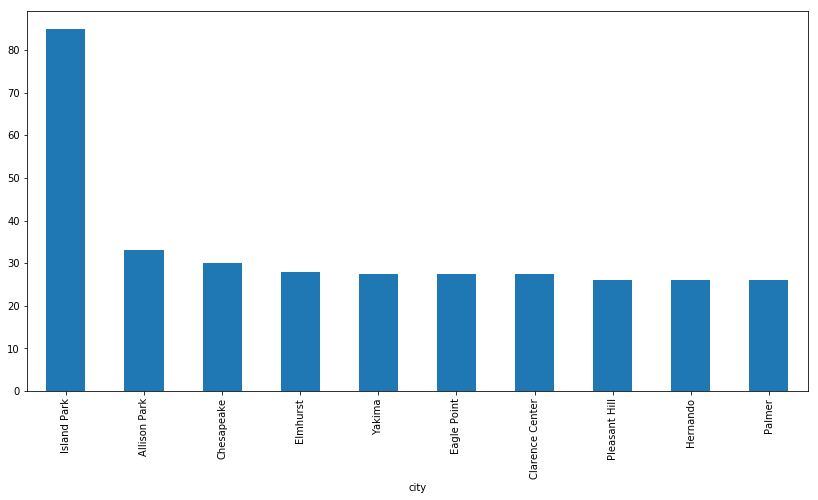

In [202]:
plt.figure(figsize=(14,7))
pizza_df.groupby("city")["menus.amountMin"].median().sort_values(ascending=False).head(10).plot(kind='bar')

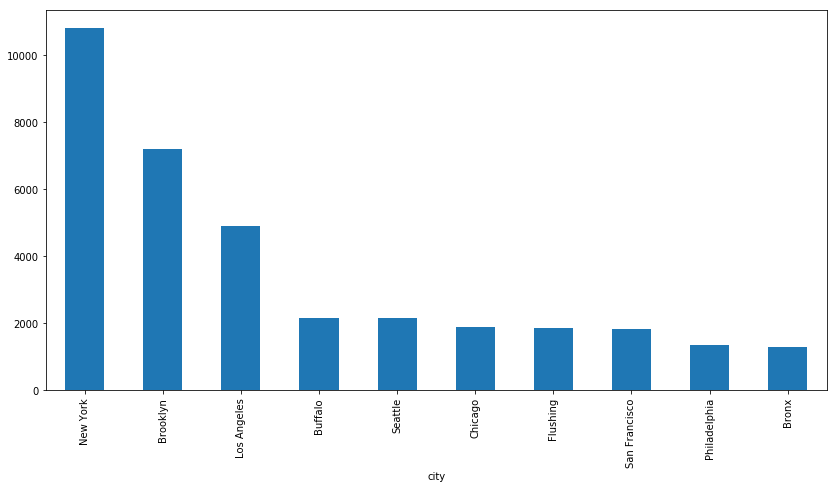

In [244]:
plt.figure(figsize=(14,7))
pizza_df.groupby("city")["menus.amountMin"].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [251]:
plt.figure(figsize=(14,7))
pizza_df.groupby("city")["menus.amountMin"].median().sort_values(ascending=False).tail(40)#.plot(kind='bar')

city
Palm Harbor         3.420
Glen Allen          3.390
Oconomowoc          3.390
Chino               3.290
Bloomingdale        3.250
Chesterton          3.250
Franklin Square     3.220
Lomita              3.190
Alto                3.000
Pagosa Springs      2.990
Irvine              2.990
Opelika             2.990
South Lake Tahoe    2.970
Woodstock           2.950
Lithia              2.950
Riverton            2.695
New Buffalo         2.600
Fountain Hills      2.500
Vero Beach          2.500
Mechanicsburg       2.500
Shelby              2.250
Ooltewah            2.000
Schaumburg          2.000
Kingwood            1.750
Bethpage            1.750
Erie                1.590
Sherrill            1.500
Homewood            1.000
Winter Park         0.500
Cadiz               0.250
Nacogdoches         0.000
Noblesville         0.000
Beaumont            0.000
New Castle          0.000
Antioch             0.000
Bartlesville        0.000
Madera              0.000
Springdale          0.000
Alma   

<Figure size 1008x504 with 0 Axes>

In [324]:
pizza_df[pizza_df["menus.name"].isin([i for i in pizza_df["menus.name"].unique() if "american" in i.lower()])].groupby("city")["name"].value_counts().sort_values(ascending=False).head(10)

city         name                    
Mamaroneck   Domino's Pizza              5
Valencia     Z Pizza                     1
Springfield  PaPPo's Pizza               1
             Coburg Pizza Company        1
Seal Beach   zpizza                      1
Oakland      Red Boy Pizza               1
Northridge   zPizza                      1
Hicksville   Pasta-eria                  1
Detroit      Passport Pizza - Midtown    1
Name: name, dtype: int64

In [18]:
#plt.figure(figsize=(14,7))
pizza_df[pizza_df["city"]=="Yakima"].head(10)#.groupby("menus.name")["menus.amountMin"].sum()#.sort_values(ascending=False)#.head(10).plot(kind='bar')

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
9350,AVwckfwm_7pvs4fzwkS_,2015-09-21T08:02:37Z,2018-02-01T05:46:28Z,4804 Tieton Dr,"Pizza Place,American",Accommodation & Food Services,Yakima,US,us/wa/yakima/4804tietondr/-509299155,46.592292,-120.573488,NaN,20.65,20.65,USD,"2016-06-20T15:40:48Z,2016-04-04T04:13:03Z",NaN,Deep Dish Pizza Crust,Abby's Pizza,98908,USD,0,25,WA
9351,AVwckfwm_7pvs4fzwkS_,2015-09-21T08:02:37Z,2018-02-01T05:46:28Z,4804 Tieton Dr,"Pizza Place,American",Accommodation & Food Services,Yakima,US,us/wa/yakima/4804tietondr/-509299155,46.592292,-120.573488,NaN,27.55,27.55,USD,"2016-06-20T15:40:48Z,2016-04-04T04:13:03Z","Garlic white sauce, cheese blend (mozzarella a...",Sicilian Pizza,Abby's Pizza,98908,USD,0,25,WA
9352,AVwckfwm_7pvs4fzwkS_,2015-09-21T08:02:37Z,2018-02-01T05:46:28Z,4804 Tieton Dr,"Pizza Place,American",Accommodation & Food Services,Yakima,US,us/wa/yakima/4804tietondr/-509299155,46.592292,-120.573488,NaN,27.55,27.55,USD,"2016-06-20T15:40:48Z,2016-04-04T04:13:03Z",NaN,Original Bbq Chicken Pizza,Abby's Pizza,98908,USD,0,25,WA


In [210]:
#plt.figure(figsize=(14,7))
pizza_df[pizza_df["city"]=="Newark"]["province"].unique()#.groupby("menus.name")["menus.amountMin"].sum()#.sort_values(ascending=False)#.head(10).plot(kind='bar')

array(['DE', 'CA', 'OH'], dtype=object)

# city with no of restaurant

In [220]:
pizza_df.groupby("city")["name"].nunique().value_counts(bins=[0,1,2,3,4,5,10,30,100])

(-0.001, 1.0]    660
(1.0, 2.0]       185
(2.0, 3.0]        66
(3.0, 4.0]        40
(5.0, 10.0]       33
(4.0, 5.0]        24
(10.0, 30.0]      16
(30.0, 100.0]      4
Name: name, dtype: int64

# percentage of city with each number of restaurant

In [219]:
round(pizza_df.groupby("city")["name"].nunique().value_counts(bins=[0,1,2,3,4,5,10,30,100],normalize=True)*100,2)

(-0.001, 1.0]    64.20
(1.0, 2.0]       18.00
(2.0, 3.0]        6.42
(3.0, 4.0]        3.89
(5.0, 10.0]       3.21
(4.0, 5.0]        2.33
(10.0, 30.0]      1.56
(30.0, 100.0]     0.39
Name: name, dtype: float64

# top 5 cities where sales is higer(summing the bills)

In [297]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("city")['menus.amountMin'].sum().sort_values(ascending = False).head()

city
New York       10819.18
Brooklyn        7217.26
Los Angeles     4919.95
Buffalo         2171.06
Seattle         2164.95
Name: menus.amountMin, dtype: float64

In [5]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='Alexandria']['name'].nunique()

8

# top 5 expensive cities 

In [408]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("city")['menus.amountMin'].median().sort_values(ascending = False).head()

city
Newark        22.15
Louisville    18.47
New York      17.00
Portland      16.99
Seattle       16.50
Name: menus.amountMin, dtype: float64

# top 5 cities where sales is lower(summing the bills)

In [407]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("city")['menus.amountMin'].sum().sort_values(ascending = False).tail()

city
Alexandria        200.69
Harrisburg        171.70
Virginia Beach    137.59
Denver            133.15
Fort Worth         96.79
Name: menus.amountMin, dtype: float64

# top 5 least expensive cities 

In [409]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("city")['menus.amountMin'].median().sort_values(ascending = False).tail()

city
Milwaukee       8.490
Philadelphia    8.325
Cincinnati      7.490
Glendale        6.225
Phoenix         5.500
Name: menus.amountMin, dtype: float64

In [406]:
 pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='Phoenix']

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
107,AVwdDZzcByjofQCxlBKL,2015-10-20T01:49:23Z,2019-04-27T09:54:30Z,3414 W Union Hills Dr,"Pizza,Italian restaurants,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/3414wunionhillsdr/775330975,33.654650,-112.132750,NaN,5.50,5.50,USD,"2018-03-31T06:15:47.938Z,2018-01-19T22:02:40.0...",NaN,Meatball Pizza Roll,Ray's Pizza,85027,USD,0,25,AZ
108,AVwdDZzcByjofQCxlBKL,2015-10-20T01:49:23Z,2019-04-27T09:54:30Z,3414 W Union Hills Dr,"Pizza,Italian restaurants,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/3414wunionhillsdr/775330975,33.654650,-112.132750,NaN,5.50,5.50,USD,"2018-03-31T06:15:47.938Z,2018-01-19T22:02:40.0...",NaN,Green Pepper and Onion Pizza Roll,Ray's Pizza,85027,USD,0,25,AZ
109,AVwdDZzcByjofQCxlBKL,2015-10-20T01:49:23Z,2019-04-27T09:54:30Z,3414 W Union Hills Dr,"Pizza,Italian restaurants,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/3414wunionhillsdr/775330975,33.654650,-112.132750,NaN,4.25,4.25,USD,"2018-03-31T06:15:47.890Z,2018-01-19T22:02:39.9...",NaN,Pizza Fries with Pepperoni Or Bacon,Ray's Pizza,85027,USD,0,25,AZ
1887,AVwcpRgQ_7pvs4fzxaHT,2016-03-31T02:22:07Z,2019-04-02T05:29:22Z,10720 W Indian School Rd,"Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/10720windianschoolrd/-1938276171,33.495299,-112.290831,NaN,21.95,21.95,USD,"2018-06-06T22:53:30.674Z,2018-06-09T09:25:59.506Z",Brothers special includes pepperoni sausage mu...,Brothers Special Sicilian Pizza,Brothers Pizza,85037,USD,0,25,AZ
1888,AVwcpRgQ_7pvs4fzxaHT,2016-03-31T02:22:07Z,2019-04-02T05:29:22Z,10720 W Indian School Rd,"Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/10720windianschoolrd/-1938276171,33.495299,-112.290831,NaN,2.50,2.50,USD,"2018-06-06T22:53:30.674Z,2018-06-09T09:25:59.506Z",NaN,Pizza by the Slice,Brothers Pizza,85037,USD,0,25,AZ
1889,AVwcpRgQ_7pvs4fzxaHT,2016-03-31T02:22:07Z,2019-04-02T05:29:22Z,10720 W Indian School Rd,"Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/10720windianschoolrd/-1938276171,33.495299,-112.290831,NaN,2.25,2.25,USD,"2016-05-03T09:10:12Z,2016-03-31T02:22:07Z",NaN,Pizza By The Slice,Brothers Pizza,85037,USD,0,25,AZ
1890,AVwcpRgQ_7pvs4fzxaHT,2016-03-31T02:22:07Z,2019-04-02T05:29:22Z,10720 W Indian School Rd,"Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/10720windianschoolrd/-1938276171,33.495299,-112.290831,NaN,0.50,0.50,USD,"2018-06-06T22:53:30.675Z,2018-06-09T09:25:59.507Z",NaN,Pizza Sauce,Brothers Pizza,85037,USD,0,25,AZ
5215,AVwdkgbUIN2L1WUfxHet,2016-04-20T10:46:03Z,2018-06-30T17:54:09Z,742 E Glendale Ave,"Italian Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/742eglendaleave/109210249,33.538760,-112.063940,NaN,100.00,100.00,USD,"2018-03-31T06:16:15.691Z,2018-01-21T21:08:38.7...",NaN,Pizza Party,Sauce,85020,USD,0,25,AZ
5216,AVwdkgbUIN2L1WUfxHet,2016-04-20T10:46:03Z,2018-06-30T17:54:09Z,742 E Glendale Ave,"Italian Restaurant,Pizza Place",Accommodation & Food Services,Phoenix,US,us/az/phoenix/742eglendaleave/109210249,33.538760,-112.063940,NaN,100.00,100.00,USD,2016-04-20T10:46:03Z,"Serves 10. 1 Classic Caesar Salad, 6 Pizzas of...",Pizza Party,Sauce,85020,USD,0,25,AZ


# average bill value of new york city


In [410]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='New York'].mean()

latitude           40.753375
longitude         -73.980495
menus.amountMax    16.606382
menus.amountMin    16.517832
priceRangeMin       3.554198
priceRangeMax      27.120611
dtype: float64

In [411]:
lc = pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='New York'][pizza_df["categories"].isin([i for i in pizza_df["categories"].unique() if "italian" in i.lower()])]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [413]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='New York']#groupby("menus.name")["menus.amountMin"].median().sort_values(ascending = False)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
27,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,11.75,11.75,USD,"2018-04-18T18:20:39.162Z,2018-05-07T19:36:54.1...",Round white pie topped with fresh mozzarella r...,12ampquot White Pizza,Salvos Pizzabar,10075,USD,25,40,NY
28,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,3.75,3.75,USD,"2018-04-18T18:20:39.162Z,2018-04-25T18:13:47.0...",NaN,2 Topping Pizza Slice,Salvos Pizzabar,10075,USD,25,40,NY
29,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,3.50,3.50,USD,"2018-04-18T18:20:39.162Z,2018-04-25T18:13:47.0...",NaN,1 Topping Pizza Slice,Salvos Pizzabar,10075,USD,25,40,NY
30,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,19.25,19.25,USD,"2018-04-18T18:20:39.162Z,2018-04-25T18:13:47.0...",Round pie topped with fresh mozzarella cheese ...,16ampquot Buffalo Chicken Pizza,Salvos Pizzabar,10075,USD,25,40,NY
31,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,16.95,16.95,USD,"2018-04-18T18:20:39.162Z,2018-06-29T15:04:42.7...",Round pie with fresh mozzarella cheese and plu...,16ampquot Margherita Pizza,Salvos Pizzabar,10075,USD,25,40,NY
32,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,12.50,12.50,USD,"2018-04-18T18:20:39.162Z,2018-06-29T15:04:42.7...",Round pie with fresh mozzarella cheese ham and...,12ampquot Hawaiian Pizza,Salvos Pizzabar,10075,USD,25,40,NY
33,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,17.75,17.75,USD,"2018-04-18T18:20:39.162Z,2018-06-29T15:04:42.7...",Round white pie topped with fresh mozzarella r...,16ampquot White Pizza,Salvos Pizzabar,10075,USD,25,40,NY
34,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,11.75,11.75,USD,"2018-04-18T18:20:39.162Z,2018-05-07T19:36:54.1...",Round pie with mozzarella cheese topped with t...,12ampquot Eggplant Pizza,Salvos Pizzabar,10075,USD,25,40,NY
35,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place Upper East Side,Pizza P...",Accommodation & Food Services,New York,US,us/ny/newyork/1477yorkave/960433863,40.770825,-73.951020,NaN,12.50,12.50,USD,"2018-04-18T18:20:39.162Z,2018-05-07T19:36:54.1...",Round pie with mozzarella cheese topped with t...,12ampquot Meat Lovers Pizza,Salvos Pizzabar,10075,USD,25,40,NY
36,AVwdK3hX_7pvs4fz2-s0,2015-10-23T03:51:31Z,2019-05-01T06:27:25Z,1477 York Ave,"Restaurant,Pizza Place 

In [422]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['menus.name'] == 'Cheese Pizza'].groupby(["city","menus.name"])["menus.name"].agg({'menus.name_count':'count'}).reset_index().sort_values("menus.name_count", ascending=False).head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



,city,menus.name,menus.name_count
5,Brooklyn,Cheese Pizza,9
30,San Francisco,Cheese Pizza,8
6,Buffalo,Cheese Pizza,7
22,New York,Cheese Pizza,7
7,Charleston,Cheese Pizza,6


# no of restaurant in number of city

In [423]:
pizza_df.groupby('city')['name'].nunique()

city
Aberdeen                2
Abilene                 1
Abingdon                1
Abington                1
Akron                   5
Alachua                 1
Alameda                 1
Alamosa                 1
Albany                  9
Albertson               1
Albuquerque             5
Aledo                   1
Alexandria              8
Allen                   1
Allentown               1
Alliance                1
Allison Park            1
Alma                    1
Alpharetta              4
Altamonte Springs       2
Alto                    1
Altoona                 2
Amarillo                1
Ambler                  2
Amelia                  1
Americus                1
Amherst                 1
Amityville              1
Anaheim                 4
Anchorage               1
Anderson                3
Andover                 1
Angola                  1
Ann Arbor               4
Annandale               1
Annapolis               1
Antioch                 1
Apex                    1
Apopka 

# restaurant which are more than in 5 cities

In [431]:
pizza_df.groupby("name")["city"].nunique()[pizza_df.groupby("name")["city"].nunique()>5]#.reset_index(inplace = True).head()

name
Brixx Wood Fired Pizza       7
California Pizza Kitchen    11
Domino's Pizza               8
Hungry Howie's Pizza         9
Hungry Howies Pizza          8
Jet's Pizza                 12
Johnny's Pizza               7
Little Caesar's Pizza       22
Little Caesars Pizza        17
Mazzio's Pizza               6
Papa John's Pizza           43
Papa Johns Pizza            23
Papa Murphy's               13
Papa Murphys                 7
Pizza Hut                   14
Sbarro                      16
zpizza                       6
Name: city, dtype: int64

# percentage of restaurant which have only one order

In [136]:
round(pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("name")["menus.name"].nunique().value_counts(bins=[0,1,2,3,4,5,11],normalize=True)*100,2)

(-0.001, 1.0]    33.38
(5.0, 11.0]      19.88
(1.0, 2.0]       14.69
(2.0, 3.0]        9.64
(3.0, 4.0]        6.82
(4.0, 5.0]        5.19
Name: menus.name, dtype: float64

# in new york restaurant % of restaurant having only 1 order

In [292]:
round(pizza_df[pizza_df['city'] == 'New York'].groupby("name")["menus.name"].nunique().value_counts(bins=[0,1,2,3,4,5,11,50],normalize=True)*100,2)

(-0.001, 1.0]    26.37
(5.0, 11.0]      21.98
(11.0, 50.0]     18.68
(1.0, 2.0]       15.38
(2.0, 3.0]        8.79
(4.0, 5.0]        5.49
(3.0, 4.0]        3.30
Name: menus.name, dtype: float64

# did a mistake over here papa john and papa john's are same same papa murphhy and little ceaser but I tried to find the restaurant which have the higher average bill value

In [221]:
pizza_df[pizza_df['name'].isin(x.name)].groupby("name")["menus.amountMin"].median().sort_values(ascending = False)

name
Papa Johns Pizza            20.99
Pizza Hut                   15.00
California Pizza Kitchen    14.79
Papa Murphys                14.00
Papa Murphy's               14.00
Papa John's Pizza           13.99
Domino's Pizza              12.99
Brixx Wood Fired Pizza      10.95
Jet's Pizza                 10.55
zpizza                      10.50
Johnny's Pizza               9.99
Hungry Howies Pizza          8.74
Little Caesar's Pizza        7.99
Little Caesars Pizza         7.99
Hungry Howie's Pizza         5.99
Sbarro                       3.59
Mazzio's Pizza               0.00
Name: menus.amountMin, dtype: float64

In [385]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='Newark'][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)][pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city']=='Newark']['province']=='CA'].head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
4633,AVwc6Z2KByjofQCxjjS-,2016-06-06T16:19:25Z,2018-07-02T23:19:22Z,2077 Newpark Mall,"Pizza,Restaurant,Chain Restaurant,Pizza Place,...",Accommodation & Food Services,Newark,US,us/ca/newark/2077newparkmall/-909106947,37.52823,-122.000245,http://www.singlepage.com/sbarro-149,3.59,3.59,USD,"2018-04-06T12:50:46.154Z,2018-06-28T11:50:18.4...",all varieties,Authentic Pan Pizza,Sbarro,94560,USD,0,25,CA
4823,AVwcw4u7kufWRAb5yw6e,2015-10-23T03:08:19Z,2018-07-02T15:56:59Z,5829 Jarvis Ave,"Restaurant,Pizza Place",Accommodation & Food Services,Newark,US,us/ca/newark/5829jarvisave/-1063388324,37.55239,-122.048035,NaN,22.15,22.15,USD,"2018-06-06T00:53:33.724Z,2018-06-29T17:33:19.4...",Topped with artichokes basil broccoli cheddar ...,Gluten Free 12ampquot Drag it Thru the Garden ...,Extreme Pizza,94560,USD,0,25,CA
4824,AVwcw4u7kufWRAb5yw6e,2015-10-23T03:08:19Z,2018-07-02T15:56:59Z,5829 Jarvis Ave,"Restaurant,Pizza Place",Accommodation & Food Services,Newark,US,us/ca/newark/5829jarvisave/-1063388324,37.55239,-122.048035,NaN,22.15,22.15,USD,"2018-06-06T00:53:33.724Z,2018-01-31T03:11:44.2...",Topped with cilantro fontina and Swiss green o...,Gluten Free 12ampquot Kickin39 Chicken Pizza,Extreme Pizza,94560,USD,0,25,CA
4825,AVwcw4u7kufWRAb5yw6e,2015-10-23T03:08:19Z,2018-07-02T15:56:59Z,5829 Jarvis Ave,"Restaurant,Pizza Place",Accommodation & Food Services,Newark,US,us/ca/newark/5829jarvisave/-1063388324,37.55239,-122.048035,NaN,8.25,8.25,USD,"2018-02-12T15:40:28.694Z,2018-06-06T00:53:33.7...",Served with black olives mozzarella mushroom p...,Pizzawich Sub,Extreme Pizza,94560,USD,0,25,CA
4826,AVwcw4u7kufWRAb5yw6e,2015-10-23T03:08:19Z,2018-07-02T15:56:59Z,5829 Jarvis Ave,"Restaurant,Pizza Place",Accommodation & Food Services,Newark,US,us/ca/newark/5829jarvisave/-1063388324,37.55239,-122.048035,NaN,17.40,17.40,USD,"2018-02-12T15:40:28.694Z,2018-06-06T00:53:33.7...",NaN,Create Your Own Gluten Free 12ampquot Cheese P...,Extreme Pizza,94560,USD,0,25,CA


In [5]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)]['city'].nunique()

53

In [4]:
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby('province')['menus.amountMin'].median().sort_values(ascending = False).head(5)

province
KY    18.47
WA    16.50
OR    16.49
NY    16.00
SC    15.99
Name: menus.amountMin, dtype: float64

In [432]:
# top 5 restaurant based on nuumber of orders
pizza_df[pizza_df.city.isin(pizza_df.groupby("city")["name"].nunique()[pizza_df.groupby("city")["name"].nunique()>5].index)].groupby("city")["name"].value_counts().sort_values(ascending = False).head()

city         name                             
Los Angeles  California Pizza Kitchen             96
Seattle      Olympia Pizza and Spaghetti House    54
New York     New York Pizza Suprema               45
Mesa         Sourdough Pizza                      42
Springfield  Coburg Pizza Company                 40
Name: name, dtype: int64

In [ ]:
                                                   EDA(10000,24)
 
# Insights
    
# Newark of CA province is the most expensive city(on the basis of bill value) though that have only 6 restaurant
'DE'-3,'CA'-18,'OH'-4(value_counts)
menus.amountMin
CA - california   22.150 (one reason is Accomodation and Food services all restaurant in CA because it is close to beaches and is tourist place )
DE - Delaware  14.500 (close to beaches)
OH - Ohio   8.975 (Ohio is basically known for monuments)


# Phoenix is the least expensive city(on the basis of bill value) 
total 9 restaurants
AZ-- Arizona state mai padhta hai (phoenix has been named as the #1 ranked pizza city in america but still less sales )
It is hotter 
                                   
                                   
# New York city has the highest number of sales of Pizza ?(the sales of pizza is more if there is italian word attached to it) 91 restaurant
Margerita Pizza is the higher ordered pizza? price is cheaper 
Artichoke Basilles Pizza Bar    34.000 has the highest bill value among all restaurant in USA
restaurant are more compared to other cities in USA
most populated city in the usa
pizza is not cheaper btw
Little Italy Gourmet Pizza    Ancona Pizza       these are the orders which are ordered in maximum number                                                       3
Famous Original Ray's Pizza   lb Pizza Burger                                                           
Famous Original Rays Pizza    Pizza Burger
Avgbv Pizza in US - 18 USD
Chicken 18 USD Veg 18.75 USD
11.75 % people eat chicken, 4.73% people are the one who prefer pizza with veg attached with
New York suprema Pizza is famous for both veg and non veg total 15 orders have been made 11 non veg, 4 veg(becoz they have few vegan options)
Little Italy Gourmet Pizza     4
Joey Pepperonis Pizza          4
26.37% restaurant in new york has got only one orders.
                                   
                                   
# Phoenix has the less number of sales of pizza (9 restaurant)
although it is the least expensive city for pizza 
no of restaurant are less not a tech hub
Ray's Pizza             16
Brothers Pizza           4
Nicks Italian Bistro     3
                      chicken                            veg
New York              77(7.7%)                          New York              31(3.1%)
Brooklyn              66(6.6%)                          Los Angeles           18(1.8%)
Los Angeles           29(2.9%)                          Brooklyn              18(1.8%)
31 - non-veg(restaurant)
22 - veg(restaurant)             italian             american
                    13 restaurant avgbv = 18 USD    4 restaurant avgbv = 20 USD
                                
top 5 pizzas in us
Cheese Pizza             299
White Pizza              225
Hawaiian Pizza           149
Buffalo Chicken Pizza    112
Pizza                    111

Cheese(63.45% people have ordered cheese piizza in which brooklyn has the higher number of cheese lover total 9 order made
17 restaurant are in more than 5 cities
       
       
# total 53 city
Restaurant level(based on averge bill value)
Papa John's pizza = 34.98 USD (chicago, brooklyn ,boulder)(64 cities)
Papa Murphy = 28 USD (Vancouver, Sacramento ,Boulder)(24 cities)
Little Caesar's Pizza = 15.98 USD (south wend, waukesha ,Tacoma)(39 cities)
       
       
# comparing the cities which have more than 5 restaurant(no of orders)
Los Angeles     California Pizza Kitchen                         96
Seattle         Olympia Pizza and Spaghetti House                54
New York        New York Pizza Suprema                           45
Mesa            Sourdough Pizza                                  42
Springfield     Coburg Pizza Company                             40
       
Sales_per_store
21 cities where sales per store is less than 51%
       
       
# on the basis of sales per store
top 5 cities which have higher sales per store  
Los Angeles
Springfield
Buffalo
Seattle
Syracuse
top 5 cities which have lower sales per store  
Fort Worth
Virginia Beach
Denver
Harrisburg
Alexandria
                                T